In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import time

# Загрузка данных

In [3]:
data_102 = pd.read_csv("Таёжное 102.csv", delimiter=";") #и сразу перевернем
data_103 = pd.read_csv("Таёжное 103.csv", delimiter=";")

In [4]:
data_102 = data_102.fillna('')
data_103 = data_103.fillna('')

In [5]:
data_102.head()

,Number,H,Depth,Rock,Color,ТЕКСТУРА,Включения органогенные,Включения минеральные,НЕФТЕНАСЫЩЕНИЕ,ПОДОШВА СЛОЯ
0,1,0.42,1019.69,Песчаники крупнозернистые,буро-\бежевые,Массивная,,Нефть,Умеренное,не охарактеризована керном
1,2,1.80,1017.89,Глины,\темно-серые,Горизонтальная параллельная,Углистый детрит,,,неровная
2,3,0.10,1017.79,Песчаники крупнозернистые,серо-\бежевые,Массивная\Горизонтальная параллельная,,Нефть,Незначительное,неровная
3,4,0.62,1017.17,Глины,\темно-серые,Горизонтальная параллельная\Горизонтальная вол...,Углистые остатки,,,неровная
4,5,0.92,1016.25,Песчаники крупнозернистые,\бежевые,Массивная,,,,неровная


In [6]:
data_103.head()

,Number,H,Depth,Rock,Color,ТЕКСТУРА,Включения органогенные,Включения минеральные,НЕФТЕНАСЫЩЕНИЕ,ПОДОШВА СЛОЯ
0,1,1.0,1009.0,Песчаники крупнозернистые,буро-\бежевые,Массивная,,Нефть,Умеренное,не охарактеризована керном
1,2,0.8,1008.2,Глины,\темно-серые,Горизонтальная параллельная,Углистый детрит,,,неровная
2,3,0.7,1007.5,Песчаники крупнозернистые,серо-\бежевые,Массивная\Горизонтальная параллельная,,Нефть,Незначительное,неровная
3,4,0.5,1007.0,Глины,\темно-серые,Горизонтальная параллельная\Горизонтальная вол...,Углистые остатки,,,неровная
4,5,0.1,1006.9,Угли,\чёрные,Горизонтальная параллельная,,,,ровная


In [11]:
descr_102 = [rock for rock in data_102.iloc[:,3:].sum(axis=1)]
descr_103 = [rock for rock in data_103.iloc[:,3:].sum(axis=1)]

In [48]:
def levenshtein_custom(str1, str2):
    start = time.time()
    levenstein_matrix = np.zeros(shape=(len(str1)+1, len(str2)+1))
    levenstein_matrix[:,0] = np.arange(len(str1)+1)
    levenstein_matrix[0,:] = np.arange(len(str2)+1)

    for i in range(1, levenstein_matrix.shape[0]):
    
        for j in range(1, levenstein_matrix.shape[1]):
            
            left_val = levenstein_matrix[i, j-1] + 1
            upper_val = levenstein_matrix[i-1, j] + 1
            
            if str1[i-1] == str2[j-1]:
                diag_val = levenstein_matrix[i-1, j-1]
            else:
                diag_val = levenstein_matrix[i-1, j-1] + 1
            
            insert_value = min([left_val, upper_val, diag_val])
            
            levenstein_matrix[i,j] = insert_value
    print("Finished in ", time.time()-start)
    return levenstein_matrix

def levenshtein_custom_v2(seq1, seq2):
    start = time.time()
    size_x = len(seq1) + 1
    size_y = len(seq2) + 1
    matrix = np.zeros ((size_x, size_y))
    for x in range(size_x):
        matrix [x, 0] = x
    for y in range(size_y):
        matrix [0, y] = y

    for x in range(1, size_x):
        for y in range(1, size_y):
            if seq1[x-1] == seq2[y-1]:
                matrix [x,y] = min(
                    matrix[x-1, y] + 1,
                    matrix[x-1, y-1],
                    matrix[x, y-1] + 1
                )
            else:
                matrix [x,y] = min(
                    matrix[x-1,y] + 1,
                    matrix[x-1,y-1] + 1,
                    matrix[x,y-1] + 1
                )
    print("Finished in ", time.time()-start)
    return matrix

Finished in  0.0


<Axes: >

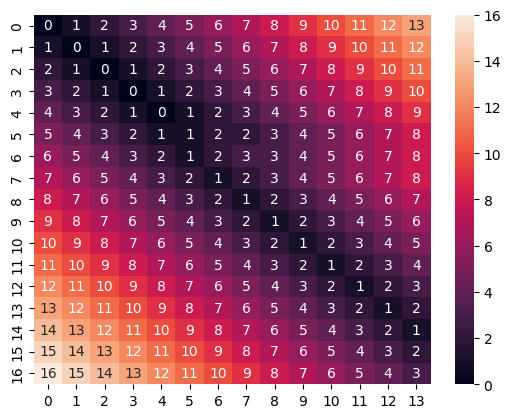

In [52]:
sns.heatmap(levenshtein_custom_v2(descr_103, descr_102), annot=True)

Finished in  0.0


<Axes: >

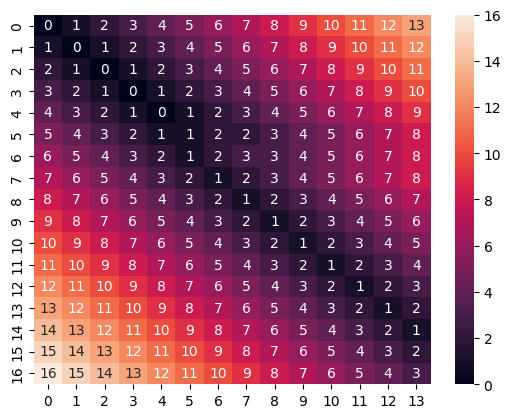

In [53]:
sns.heatmap(levenshtein_custom(descr_103, descr_102), annot=True)